In [1]:
import tensorflow as tf 
tf.enable_eager_execution()

from tensorflow.keras.backend import clear_session
# https://github.com/keras-team/keras/issues/2102#issuecomment-233773649
clear_session() 

import tensorflow_probability as tfp 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline 

tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

n = 2000
x = tfd.Uniform(low=-1, high=1).sample([n, 1])
y = x * (1 + tfd.Normal(loc=0., scale=0.1).sample([n, 1]))

inputs = tfkl.Input(shape=(1,))
hidden = tfkl.Dense(12, activation='relu')(inputs)
output_shape = (1,)
distribution_parameters = tfkl.Dense(tfpl.IndependentNormal.params_size(output_shape))(hidden)
outputs = tfpl.IndependentNormal(output_shape)(distribution_parameters)

model = tfk.Model(inputs=inputs, outputs=outputs)

batch_size = 100
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.02),
              loss=lambda y, d: -d.log_prob(y))
history = model.fit(x, y,
                    batch_size=batch_size,
                    epochs=20,
                    steps_per_epoch=n // batch_size)



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20/20 [==============================] - 0s 6ms/step - loss: 0.4661
Epoch 2/20
20/20 [==============================] - 0s 1ms/step - loss: -0.8883
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: -1.3368
Epoch 4/20
20/20 [==============================] - 0s 1ms/step - loss: -1.4440
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: -1.5038
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: -1.5519
Epoch 7/20
20/20 [==============================] - 0s 1ms/step - loss: -1.6259
Epoch 8/20
20/20 [==============================] - 0s 1ms/step - loss: -1.6543
Epoch

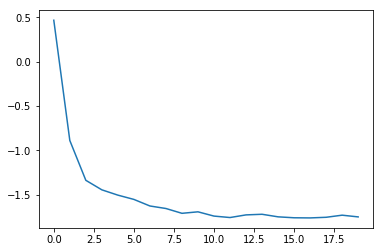

In [2]:
plt.plot(history.epoch, history.history['loss'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 26        
_________________________________________________________________
independent_normal (Independ [(None, 1), (None, 1)]    0         
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


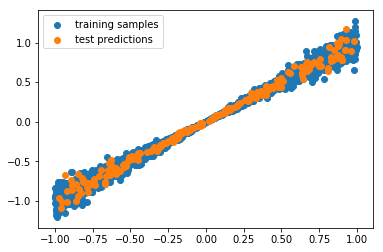

In [4]:
x_test = tfd.Uniform(low=-1, high=1).sample([200, 1])

plt.scatter(x, y, label='training samples')
plt.scatter(x_test, model(x_test).sample(), label='test predictions')
plt.legend()